In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/Project-Housing--2---1-/Project-Housing_splitted/train.csv")
df2=pd.read_csv("C:/Users/surendar.reddy/Documents/data Science projet_Data traine/Project-Housing--2---1-/Project-Housing_splitted/test.csv")
pd.set_option('display.max_rows', None)
#decided to concat these data frames, As the imputed labels would be same in both the sets.
df =df1.append(pd.DataFrame(data = df2),ignore_index=True)
df.shape

(1460, 81)

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [4]:
df.info()
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
#drop-ID
df.drop(columns=['Id'],axis=1,inplace=True)

In [7]:
#frequency of categories
for col in df:
    print(df[col].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
24.0      19
68.0      19
64.0      19
73.0      18
55.0      17
79.0      17
72.0      17
63.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
57.0      12
40.0      12
71.0      12
67.0      12
82.0      12
43.0      12
76.0      11
69.0      11
53.0      10
88.0      10
86.0      10
34.0      10
92.0      10
84.0       9
44.0       9
77.0       9
62.0       9
35.0       9
96.0       8
61.0       8
98.0       8
93.0       8
95.0       7
107.0      7
120.0      7
58.0       7
48.0       6
81.0       6
110.0      6
105.0 

<AxesSubplot:ylabel='Density'>

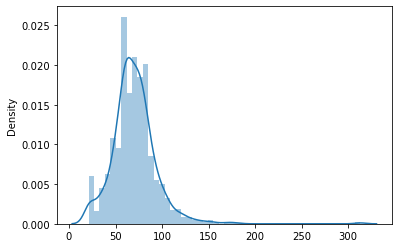

In [8]:
#Willstart with imputing the missingvalues going one after the oher based on the description data document
#Will impute th emissing with average

sns.distplot(x=df['LotFrontage'])
#This looks right screwed and I feel the best way to impute these values would be mean/Simple Imputer


<AxesSubplot:xlabel='LotFrontage'>

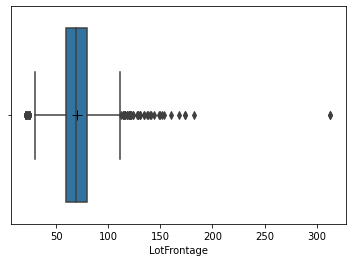

In [9]:
sns.boxplot(x=df['LotFrontage'], showmeans=True,
            meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

Missing values Stratergy for other catogorical Value

#Alley-Encode so that Nan which are "Not avalable" catogory will fall correctly


#Basement not available for Nan catogory-So just Encoding will work for all the columns
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38

#Encoding for these catogorical variable will do the imputing function also
FireplaceQu       690 NA=No Fireplace- Encoding will work

#Encoding for these catogorical variable will do the imputing function also
GarageType         81 NA	No Garage-Encoding will work
GarageYrBlt        81-No Garage-will replace with 0000 year, As theer is no garage
GarageFinish       81-NA	No Garage-Encoding will work
GarageQual         81-NA	No Garage-Encoding will work
GarageCond         81-NA	No Garage-Encoding will work

#Encoding for these catogorical variable will do the imputing function also
PoolQC           1453-NA	No Pool
Fence            1179-NA	No Fence
MiscFeature      1406-NA	None

In [11]:
# Studing the distribution of all the columns
categorial_features=df.select_dtypes(include=[np.object])
int_features=df.select_dtypes(include=[np.int])
float_features=df.select_dtypes(include=[np.float])

### Study of features and how there influence the sales volumn


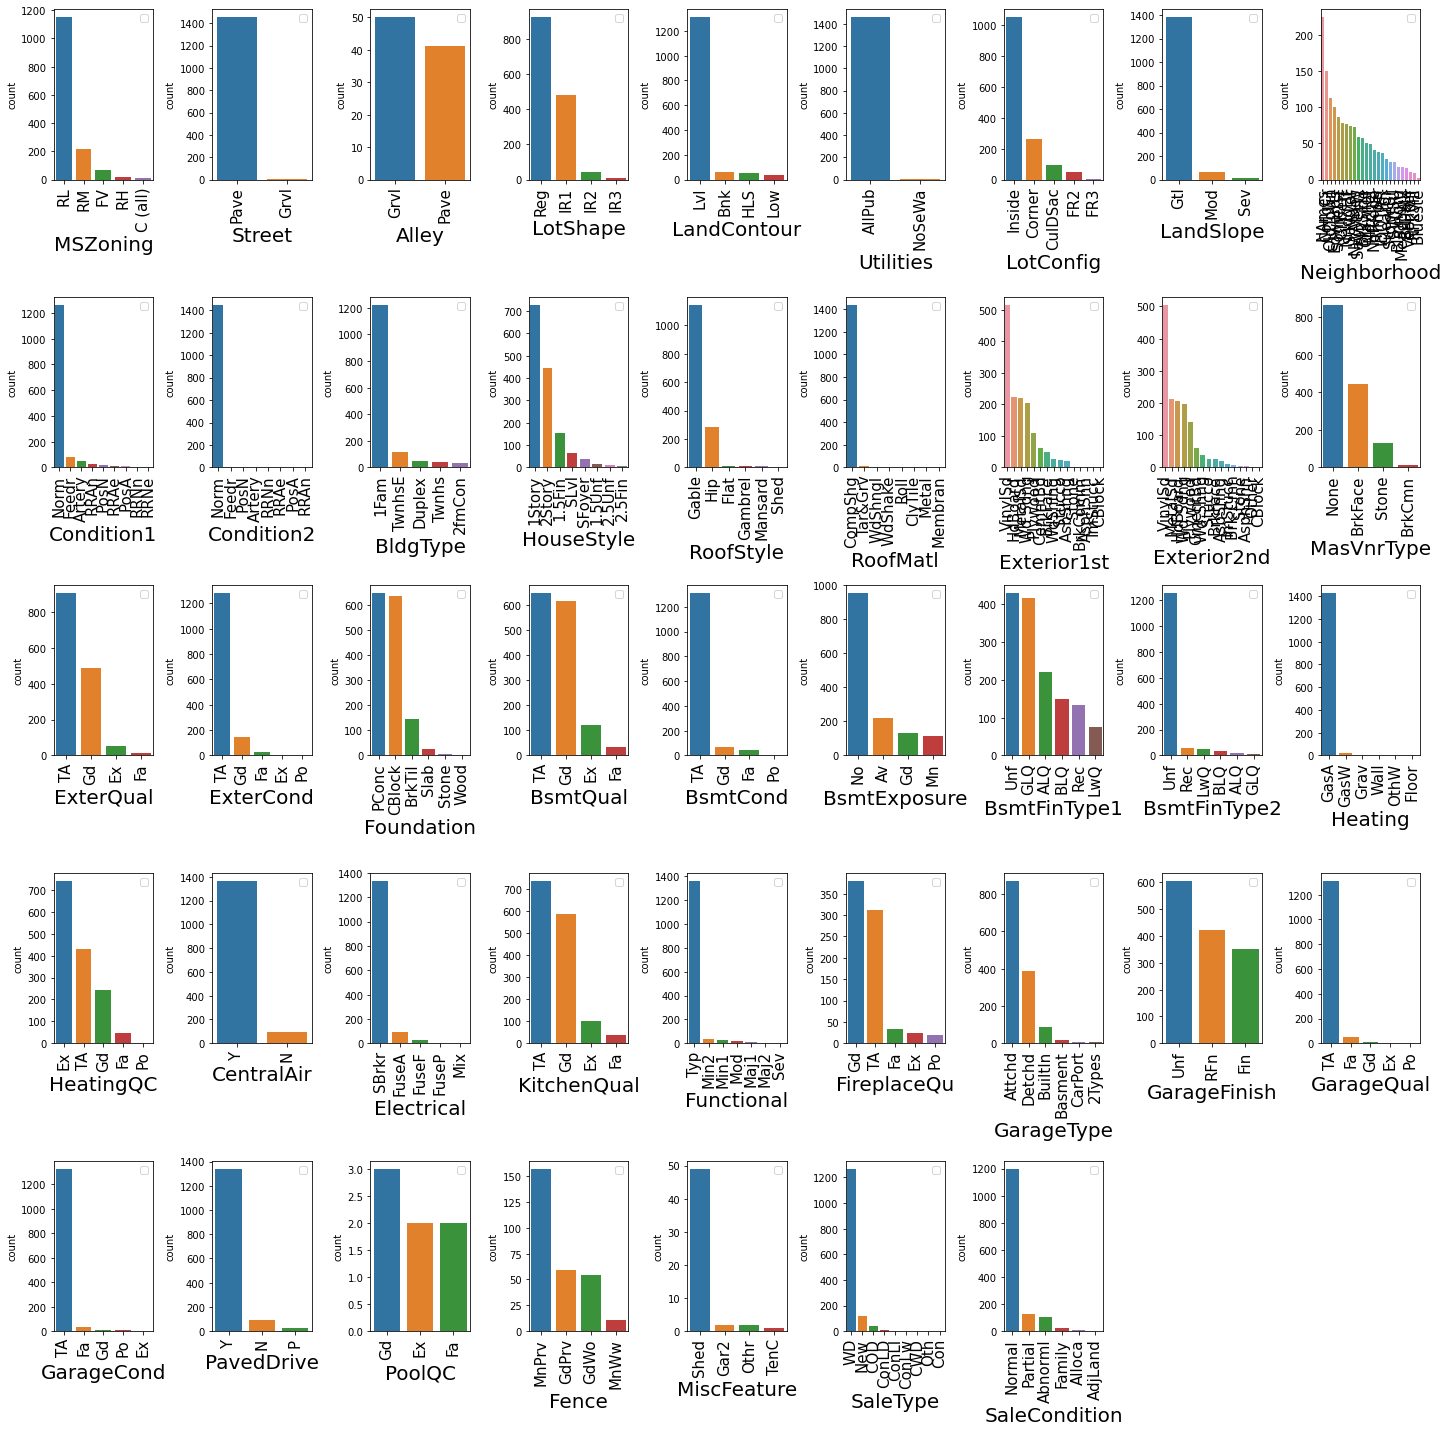

In [13]:
#This will show what are the catogories how there are in the table, More graphically, looks like the catogories imbalanced
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in categorial_features:
    if plotnumber<=45:
        ax=plt.subplot(5,9,plotnumber)
        
        sns.countplot(x=categorial_features[column], data=categorial_features,order=categorial_features[column].value_counts().index)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

In [21]:
SalePrice=pd.DataFrame(df['SalePrice'])
abc = pd.concat([categorial_features, SalePrice], axis=1)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
8          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
10         RM   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
11         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
12         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
15         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
16         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
17         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
19         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
21         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
22         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
23         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
24         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
25         RL   Pave   NaN      Reg         Bnk    AllPub    Corner       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
28         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
29         RL   Pave   NaN      IR1         HLS    AllPub    Inside       Mod   
30         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
31         RM   Pave  Grvl      Reg         HLS    AllPub    Inside       Gtl   
32         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
33         RM   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave   NaN      IR2         Lvl    AllPub    Corner       Gtl   
35         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
36         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
37         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
38         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
39         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
41         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
42         FV   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
43         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
44         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
46         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
47         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
48         RL   Pave   NaN      Reg 

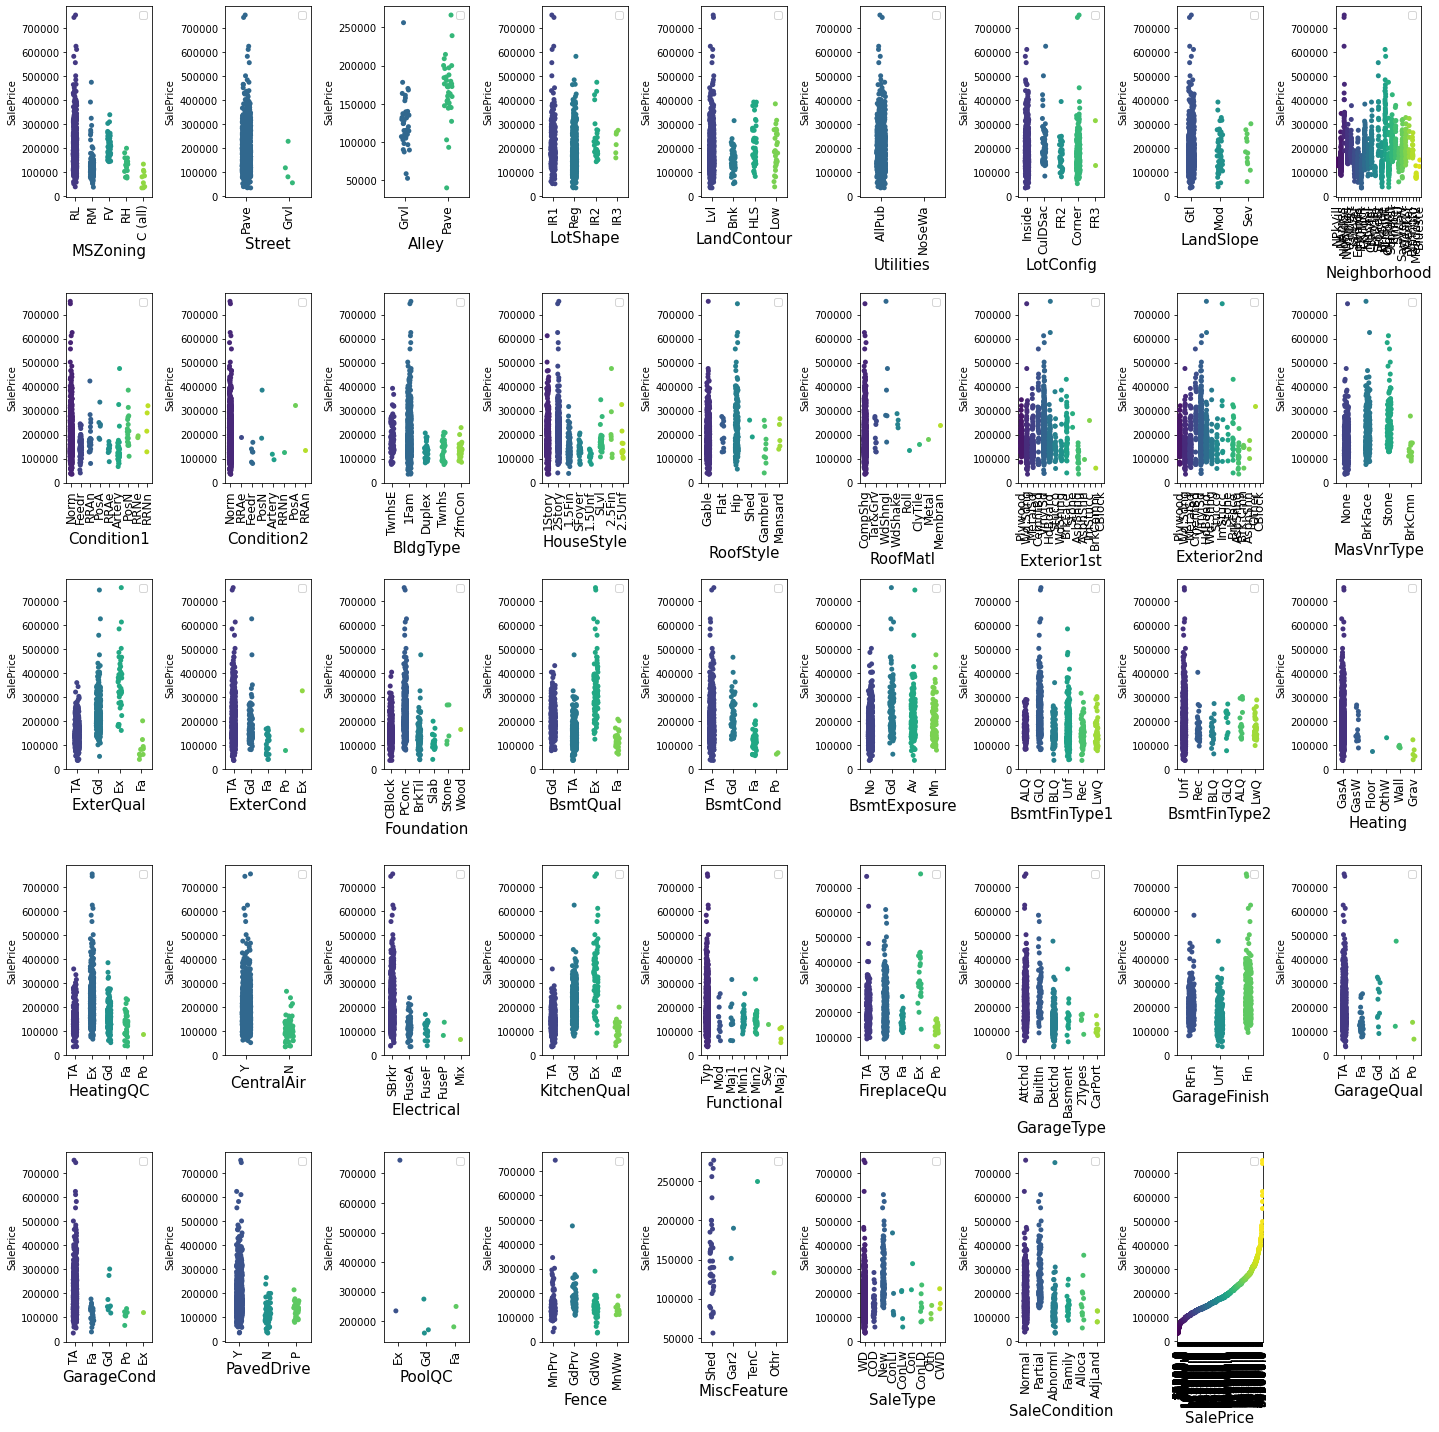

In [23]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in abc:
    if plotnumber<=45:
        ax=plt.subplot(5,9,plotnumber)
        
        sns.stripplot(x=abc[column],y='SalePrice', data=abc, jitter=True,  dodge=True, palette='viridis')
        plt.xlabel(column,fontsize=15)
        plt.xticks(size=12, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

## The features which add sales Price significantly are-make the sale Price High- Can Invest on these properties having these features

1) RL	Residential Low Density

2)	Paved Street

3) AllPub	All public Utilities (E,G,W,& S)

4)having all  Normal Conditions

5)1Fam	Single-family Detached- have high Sales

6)Gable	Gable, Hip	Hip, Roofs have high price

7)Fair Basement (70-79 inches), Average garage Quality- start high sales price

8) SBrkr-Standard Circuit Breakers & Romex Eectricity is expected to have high sales

## The features which do not have sale impact- Can inore these faetures when investing
1)alley
2)Neighbourhood
3)LotConfig
4)Exterior1st: Exterior covering on house, Exterior covering on house (if more than one material)
5)MasVnrType
6)BsmtExposure: Refers to walkout or garden level walls
7)GarageFinish: Interior finish of the garage
8)SaleType: Type of sale
9)SaleCondition: Condition of sale


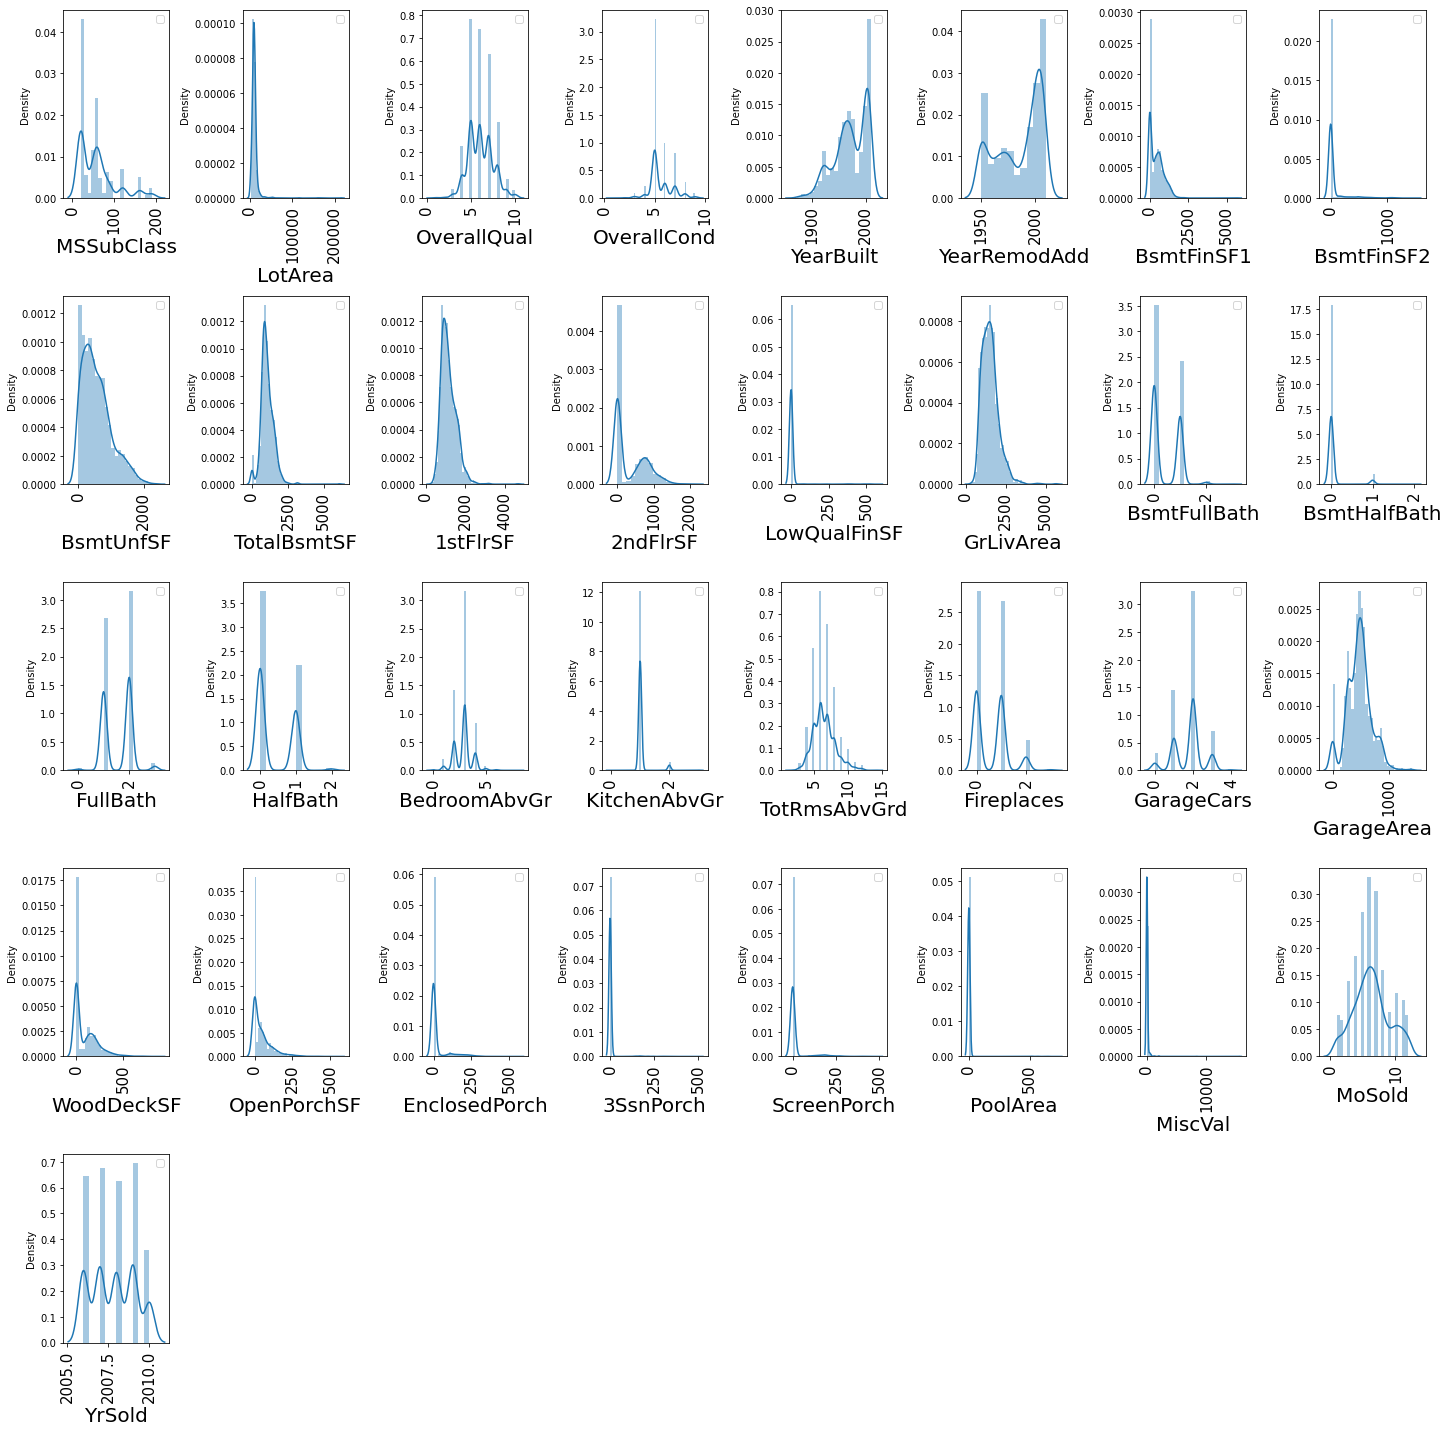

In [13]:

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in int_features:
    if plotnumber<=35:
        ax=plt.subplot(5,8,plotnumber)
        
        sns.distplot(x=int_features[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

In [27]:
num= pd.concat([int_features, SalePrice], axis=1)
num

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            120     4928            6            5       1976          1976   
1             20    15865            8            6       1970          1970   
2             60     9920            7            5       1996          1997   
3             20    11751            6            6       1977          1977   
4             20    16635            6            7       1977          2000   
5             60    14054            7            5       2006          2006   
6             20    11341            5            6       1957          1996   
7             20    13125            5            4       1957          2000   
8             20     9170            5            7       1965          1965   
9             50     8480            5            5       1947          1950   
10            50     8600            6            6       1937          1950   
11            60     9548            7            6       2003          2003   
12            20     9196            7            5       2003          2003   
13            20     8892            5            5       1960          1960   
14            50    16466            5            7       1955          1955   
15            70    10592            6            7       1923          1996   
16            30     5890            6            8       1930          2007   
17            20     7314            7            5       2007          2007   
18            20     7917            6            7       1976          1976   
19           160     2016            5            5       1970          1970   
20            60    12435            7            5       2001          2001   
21            85     8445            5            7       1972          2007   
22            20     9717            5            6       1950          1996   
23            20    10659            5            6       1961          1961   
24            20     9230            5            8       1965          1998   
25            20    21000            6            5       1953          1953   
26            30    25339            5            7       1918          2007   
27            20    11394            9            2       2010          2010   
28            45     6380            5            6       1922          1950   
29            70    11988            6            7       1934          1995   
30           120     7658            9            5       2005          2005   
31            60     3378            7            8       1946          1992   
32            90    18890            5            5       1977          1977   
33            50    12358            5            6       1941          1950   
34            60    14762            5            6       1948          1950   
35            20    10356            5            6       1975          1975   
36            20    10400            7            5       1976          1976   
37            20    12615            6            7       1950          2001   
38            85     7540            6            6       1978          1978   
39            40     9100            5            6       1930          1960   
40            20    31770            6            5       1960          1960   
41            20    13300            5            7       1956          2000   
42           160     3180            7            5       2005          2005   
43           160     2522            6            5       2004          2006   
44            80     8385            5            8       1977          1977   
45            20     8314            5            7       1982          1982   
46            60     8123            6            5       2000          2000   
47            20    12000            5            7       1948          2005   
48            20     5000            1            3       1946          1950   
49    

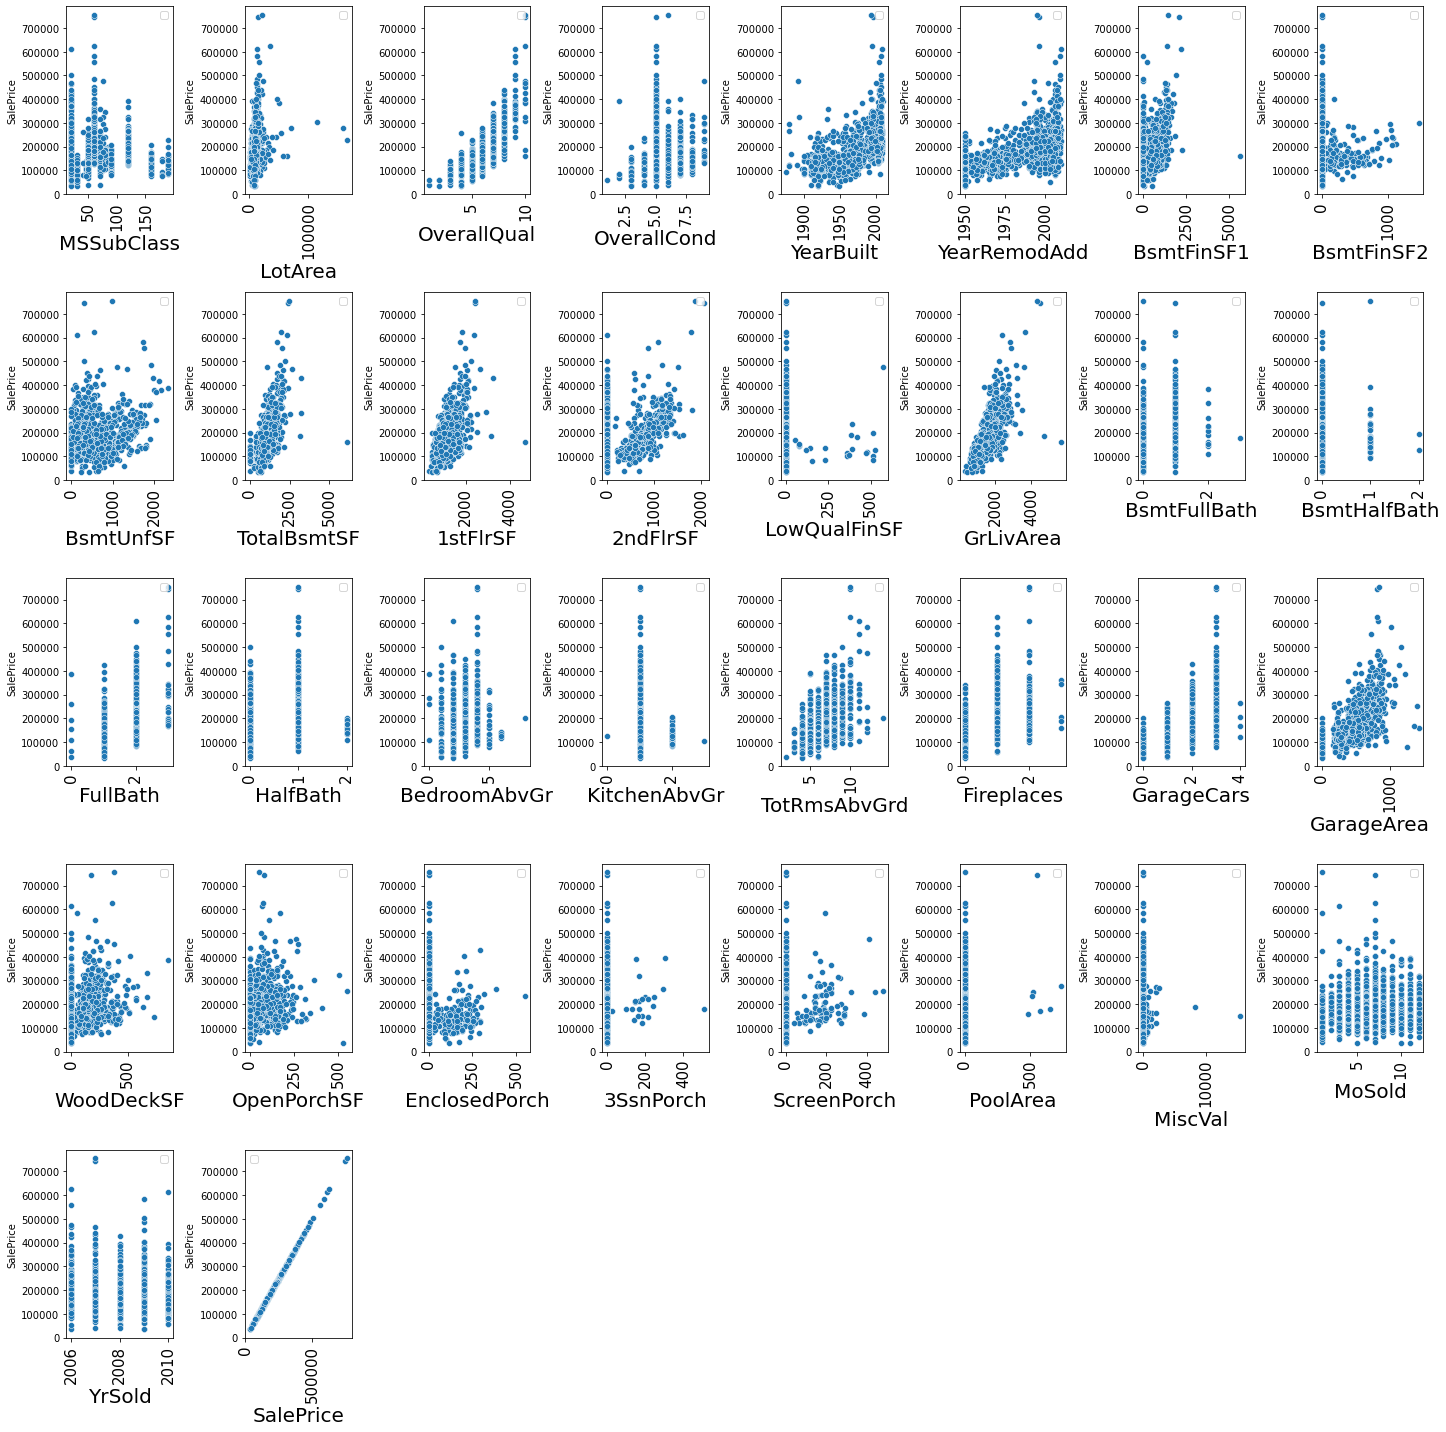

In [29]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=35:
        ax=plt.subplot(5,8,plotnumber)
        
        sns.scatterplot(x=num[column],y='SalePrice',data=num)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 



## Parameters which impact sales price to make better

1)Overall quality- influences more price
2)Floor square feet- possitively influence the price
2)Average Overall conition show more price
3)New Houses have slightly more price
4)Average basement sft is expected more
5)TotRmsAbvGrd: Total rooms above grade-Good Grade is expected to give more price
6)GrLivArea: Above grade (ground) living area square feet- Give more price
7)Size of garage in car capacity- higher the better

## Parameters which does not matter
1)Mo Sold
2)Yr sold
3)OpenPorchSF area
4)EnclosedPorch area
5) Wood deck area do not influence the price
6)Total rooms above grade 


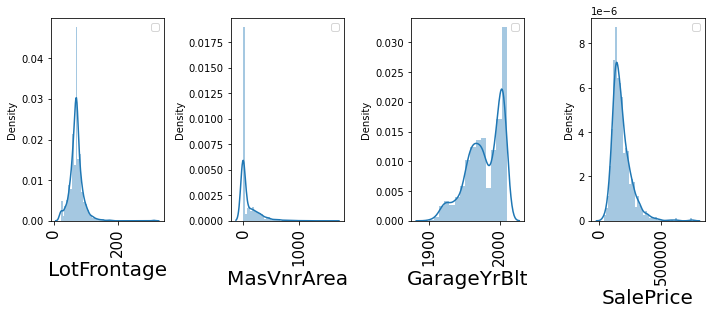

In [14]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in float_features:
    if plotnumber<=35:
        ax=plt.subplot(5,8,plotnumber)
        
        sns.distplot(x=float_features[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 

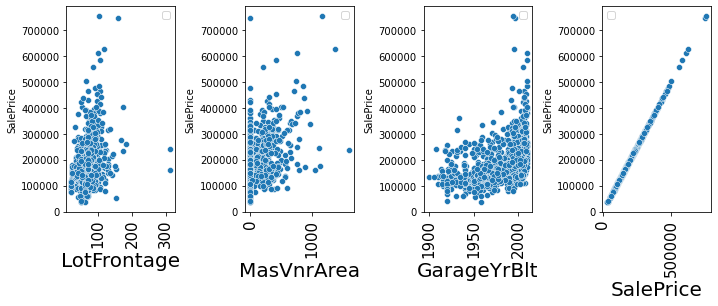

In [30]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in float_features:
    if plotnumber<=35:
        ax=plt.subplot(5,8,plotnumber)
        
        sns.scatterplot(x=float_features[column],y='SalePrice',data=num)
        plt.xlabel(column,fontsize=20)
        plt.xticks(size=15, rotation=90)
        plt.legend([],[], frameon=True)
      
    plotnumber+=1
plt.tight_layout() 


## Features influencing
LotFrontage to an extent of 150 linear feet of street connected influence the price possitivelity
Masonry veneer area to an extent of 500 sft influence possitivly the sales price
GarageYrBlt do not influence the Sales Price

### Distribution of the Data
The catogorical values look imbalance in most of the fatures, this is expected as more frequent features are basic comodities in a house

The values in numerical features look Right screwed, 
The features which neeed power trasformation may be got more preside from screw value

In [15]:
int_features.skew()
# Columns values not between -0.5 to +0.5  and are continours features are selected


MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64

## Catogorical data

MSSubClass        1.407657- It is catogorical data
OverallQual       0.216944-It is catogorical data-scaled
OverallCond       0.693067-It is catogorical data-Ranked
YearBuilt        -0.613461-Data-Real, Not outliers
YearRemodAdd     -0.503562-Data-Real, Not outliers
BsmtFinSF1        1.685503-It is catogorical
BsmtFinSF2        4.255261-It is catogorical
BsmtFullBath      0.596067-Basement full bathrooms
BsmtHalfBath      4.103403-Number
FullBath          0.036562-Number
HalfBath          0.675897-Number
BedroomAbvGr      0.211790-Number
KitchenAbvGr      4.488397-Number
TotRmsAbvGrd      0.676341-Number
Fireplaces        0.649565-Number
MoSold            0.212053-Month
YrSold            0.096269-Year

## Data in Square feet--Real Data, Outliers are not errors
LotArea          12.207688-Lot area in sq feet

BsmtUnfSF         0.920268-Unfinished square feet of basement -Real Data, Outliers are not errors
TotalBsmtSF       1.524255-Unfinished square feet of basement -Real Data, Outliers are not errors
1stFlrSF          1.376757-First Floor square feet
2ndFlrSF          0.813030-Second floor square feet
LowQualFinSF      9.011341-Low quality finished square feet (all floors)
GrLivArea         1.366560-Above grade (ground) living area square feet

GarageCars       -0.342549-Size of garage in car capacity
GarageArea        0.179981-Space in Square feet
WoodDeckSF        1.541376-Wood deck area
OpenPorchSF       2.364342-Open porch area
EnclosedPorch     3.089872-Enclosed porch area
3SsnPorch        10.304342-Three season porch area
ScreenPorch       4.122214-Screen porch area
PoolArea         14.828374-Pool area

## value of money for the features, Cannot correct the screwness 

MiscVal          24.476794-Value of Money


In [16]:
# Missing values in GarageYrBlt: Year garage was built where there is no Garage , Will replace with 0000
df['GarageYrBlt'] = df['GarageYrBlt'].replace({np.nan:0000,})

In [17]:
df['GarageYrBlt'].isnull().sum()

0


 2   MSZoning       1460 non-null   object 
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 
 21  RoofStyle      1460 non-null   object 
 22  RoofMatl       1460 non-null   object 
 23  Exterior1st    1460 non-null   object 
 24  Exterior2nd    1460 non-null   object 
 25  MasVnrType     1452 non-null   object 
 
 27  ExterQual      1460 non-null   object - Ordinal Encoder
 28  ExterCond      1460 non-null   object -Ordinal Encoder
 29  Foundation     1460 non-null   object 
 30  BsmtQual       1423 non-null   object -Ordinal Encoder
 31  BsmtCond       1423 non-null   object -Ordinal encoder
 32  BsmtExposure   1422 non-null   object -Ordinal encoder
 33  BsmtFinType1   1423 non-null   object -Ordinal
 35  BsmtFinType2   1422 non-null   object -Ordinal Encoder

 
 39  Heating        1460 non-null   object 
 40  HeatingQC      1460 non-null   object -Ordinal Encoder
 41  CentralAir     1460 non-null   object 
 42  Electrical     1459 non-null   object 
 
 53  KitchenQual    1460 non-null   object-Ordinal Encoder
 
 55  Functional     1460 non-null   object 
 
 57  FireplaceQu    770 non-null    object -Ordinal Encoder
 58  GarageType     1379 non-null   object 
 
 60  GarageFinish   1379 non-null   object-ordinal

 63  GarageQual     1379 non-null   object -Ordinal
 64  GarageCond     1379 non-null   object -Ordinal
 65  PavedDrive     1460 non-null   object -Ordinal
 
 72  PoolQC         7 non-null      object -Ordinal
 73  Fence          281 non-null    object 
 74  MiscFeature    54 non-null     object 
 
 78  SaleType       1460 non-null   object 
 79  SaleCondition  1460 non-null   object 
 

# Will use Ordinal Encoder where there is order seen, rating etc.
# Will use one hot encoder for other objec columns as the order does not matter-Nominal data


In [18]:
## Customised based on the values in data set

custom_mapping = {'Ex': 9, 'Gd': 7, 'TA': 5, 'Fa': 3, 'Po': 2, 'NaN':0, np.nan:0}

df['ExterQual'] = df['ExterQual'].map(custom_mapping)
df['ExterCond'] = df['ExterCond'].map(custom_mapping)
df['BsmtQual'] = df['BsmtQual'].map(custom_mapping)
df['BsmtCond'] = df['BsmtCond'].map(custom_mapping)
df['HeatingQC'] = df['HeatingQC'].map(custom_mapping)
df['KitchenQual'] = df['KitchenQual'].map(custom_mapping)
df['FireplaceQu'] = df['FireplaceQu'].map(custom_mapping)
df['GarageQual'] = df['GarageQual'].map(custom_mapping)
df['GarageCond'] = df['GarageCond'].map(custom_mapping)
df['PoolQC'] = df['PoolQC'].map(custom_mapping)

In [19]:
custom_mapping_2 = {'GLQ': 7, 'ALQ': 5, 'Rec': 4.5, 'BLQ': 4, 'LwQ': 2, 'Unf': 1,'NaN':0, np.nan:0}
df['BsmtFinType2'] = df['BsmtFinType2'].map(custom_mapping_2)
df['BsmtFinType1'] = df['BsmtFinType1'].map(custom_mapping_2)

In [20]:
custom_mapping_3 = {'Gd': 7, 'Av': 5, 'Mn': 3, 'No': 1, 'NaN':0, np.nan:0}
df['BsmtExposure'] = df['BsmtExposure'].map(custom_mapping_3)

In [21]:
custom_mapping_4 = {'Y': 3, 'P': 2, 'N': 1}
df['PavedDrive'] = df['PavedDrive'].map(custom_mapping_4)

In [22]:
custom_mapping_5 = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NaN': 0, np.nan: 0}
df['GarageFinish'] = df['GarageFinish'].map(custom_mapping_5)

In [23]:
#Check out, the Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
# For rest of the object column , I will use One hot Encoder, Creat dummies
from sklearn.preprocessing import OneHotEncoder
categorical_vars = ["MSZoning", "Street",'Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','Functional','GarageType','Fence','MiscFeature','SaleType','SaleCondition']
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

# apply the one hot encoder logic 
encoder_vars_array = one_hot_encoder.fit_transform(df[categorical_vars])

# create object for the feature names using the categorical variables
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

# create a dataframe to hold the one hot encoded variables
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)

# concatenate the new dataframe back to the original input variables dataframe
df_new = pd.concat([df.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_new.drop(categorical_vars, axis = 1, inplace = True)

In [25]:
df_new.shape

(1460, 216)

In [26]:
df_new.isnull().sum()

MSSubClass                 0
LotFrontage                0
LotArea                    0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
MasVnrArea                 8
ExterQual                  0
ExterCond                  0
BsmtQual                   0
BsmtCond                   0
BsmtExposure               0
BsmtFinType1               0
BsmtFinSF1                 0
BsmtFinType2               0
BsmtFinSF2                 0
BsmtUnfSF                  0
TotalBsmtSF                0
HeatingQC                  0
1stFlrSF                   0
2ndFlrSF                   0
LowQualFinSF               0
GrLivArea                  0
BsmtFullBath               0
BsmtHalfBath               0
FullBath                   0
HalfBath                   0
BedroomAbvGr               0
KitchenAbvGr               0
KitchenQual                0
TotRmsAbvGrd               0
Fireplaces                 0
FireplaceQu                0
GarageYrBlt   

In [27]:
#There are missing MasVnrArea , in this there is no MasVnrType is None, So the area is o square feet.
#Import Null values are 0

df_new['MasVnrArea'] = df_new['MasVnrArea'].replace({np.nan:0},regex=True)

In [28]:
df_new['MasVnrArea'] 

0          0.0
1          0.0
2          0.0
3        480.0
4        126.0
5          0.0
6        180.0
7         67.0
8          0.0
9          0.0
10         0.0
11       223.0
12         0.0
13        66.0
14         0.0
15         0.0
16         0.0
17        82.0
18       174.0
19       304.0
20       172.0
21         0.0
22         0.0
23         0.0
24       166.0
25       184.0
26         0.0
27       350.0
28         0.0
29         0.0
30       412.0
31         0.0
32         1.0
33         0.0
34         0.0
35         0.0
36       189.0
37         0.0
38         0.0
39         0.0
40       112.0
41         0.0
42         0.0
43        50.0
44       220.0
45         0.0
46        16.0
47         0.0
48         0.0
49         0.0
50       630.0
51         0.0
52         0.0
53         0.0
54         0.0
55       281.0
56       287.0
57         0.0
58         0.0
59         0.0
60         0.0
61         0.0
62         0.0
63       340.0
64         0.0
65       216.0
66        

## Successfull created a dataset

### As there are many dimentions to this data set want to reduce dimentions of this data set using PCA technique

In [29]:
df1.shape

(1168, 81)

In [30]:
#Seperate the test and train x and y
Data_test=df_new[1168:]
Data_test
df=df_new[0: 1167]
df.shape

(1167, 216)

In [31]:
df2.shape

(292, 80)

In [32]:
Data_test.shape

(292, 216)

In [33]:
df2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [34]:
Data_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1168          20    86.000000    14157            9            5       2005   
1169         120    70.049958     5814            8            5       1984   
1170          20    70.049958    11838            8            5       2001   
1171          70    75.000000    12000            7            7       1941   
1172          60    86.000000    14598            6            5       2007   
1173         180    21.000000     1936            4            6       1970   
1174         180    35.000000     3675            5            5       2005   
1175          20   107.000000    13891            8            5       2007   
1176          80    70.049958    12800            7            5       1989   
1177         120    32.000000     4500            6            5       1998   
1178          30    60.000000     6324            4            6       1927   
1179          20    70.049958     9503            5            5       1958   
1180          20   100.000000    21750            5            5       1954   
1181          20    50.000000    35133            5            4       1963   
1182          20   110.000000    14226            8            5       2006   
1183          50    50.000000     8405            5            8       1900   
1184          20    70.049958     8780            5            5       1985   
1185          20    70.000000     9100            5            5       1958   
1186         160    35.000000     3735            7            5       1999   
1187         160    44.000000     5306            7            7       1987   
1188          70    50.000000     9000            7            9       1920   
1189          20    71.000000     8197            6            5       1977   
1190          20    70.049958    10355            5            5       1967   
1191         190    70.000000     5600            4            5       1930   
1192          30    52.000000     6292            6            5       1930   
1193          20    37.000000     6951            5            5       1984   
1194          60    62.000000     7917            6            5       1999   
1195          20    78.000000     7800            5            6       1954   
1196          60    90.000000    11700            6            6       1968   
1197          30    60.000000     9786            3            4       1922   
1198          90    68.000000     8930            6            5       1978   
1199          20    67.000000    10083            7            5       2003   
1200          20    70.000000     9100            7            5       2004   
1201          20    80.000000    11900            6            5       1957   
1202          30    52.000000     9022            5            8       1924   
1203          80    76.000000     9967            7            5       2000   
1204          60    70.000000     8462            6            5       1994   
1205         160    21.000000     1680            5            7       1972   
1206          60    70.049958    12936            6            6       1972   
1207         160    24.000000     2289            6            6       1978   
1208          20    50.000000     6000            5            5       1948   
1209          60    80.000000     9200            8            5       1998   
1210          60    70.049958    12394            7            5       2003   
1211          20    62.000000     7500            7            5       2004   
1212          85    57.000000     8846            5            5       1996   
1213          50    52.000000     6240            6            6       1931   
1214          20    70.000000     7560            5            5       1959   
1215          30    30.000000     5232            5            5       1925   
1216         120    34.000000     5001            7            5       2007   
1217          20    86.000000    13286            9     

### The datasets seperated correctly

In [35]:
x=df.drop(columns=['SalePrice'],axis=1)
y=df['SalePrice']

In [36]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

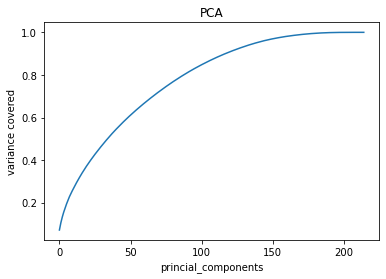

In [37]:
from sklearn.decomposition import PCA
pca=PCA()
components=pca.fit_transform(x_scaled)
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()
#I will use all 170 componets for model building 

In [39]:
#spliting dataframe by columns
principl_component=pd.DataFrame(components)

In [42]:
principl_component=principl_component.iloc[:,:170]

In [43]:
#Train the data to the model
x_train, x_test, y_train, y_test=train_test_split(principl_component,y,test_size=0.25, random_state=100)

In [46]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train,sample_weight=100)
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
print(RFR_accuracy)

0.8325727537002727


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_clf=GradientBoostingRegressor()
gbdt_clf.fit(x_train,y_train)
y_pred=gbdt_clf.predict(x_test)
gbdt_clf_accuracy=metrics.r2_score(y_test,y_pred)
gbdt_clf_accuracy

0.8308391086290393

In [48]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
ada_accuracy=metrics.r2_score(y_test,y_pred)
print(ada_accuracy)

0.7615231298589534


## will go with random forest Regressor
### Check if the model is overfitting-By Cross validation techniques, K-Value Cross validation scores

In [50]:
#Cross Validation
from sklearn.model_selection import KFold,cross_val_score
k_f=KFold(n_splits=5, shuffle=True)
k_f
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
from sklearn.metrics import accuracy_score
k=5
acc_score = []

for train_index , test_index in k_f.split(x_scaled):
    x_train , x_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    RFR.fit(x_train,y_train)
    pred_values = RFR.predict(x_test)
     
    acc = metrics.r2_score(y_test,pred_values)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8153551359127361, 0.8205411901636683, 0.8621001477515488, 0.8724167414464075, 0.8559472918022335]
Avg accuracy : 0.8452721014153187


### This cross validation scres looks very Promising, Lets go ahead hypertunning if possible

In [51]:
from sklearn.model_selection import GridSearchCV

RFR=RandomForestRegressor()
params={'n_estimators':[60,70,90],
        'criterion':['mse','gini'],
        'max_depth':[10,11,12,13,14,15,16,17,18,19,20],
         'min_samples_split':[10,11,15],
         'min_samples_leaf':[4,5]
       }
grd=GridSearchCV(RFR,param_grid=params,)
grd.fit(x_train,y_train)
RFR=grd.best_estimator_
y_pred=RFR.predict(x_test)
RFR_accuracy=metrics.r2_score(y_test,y_pred)
RFR_accuracy

0.8343965027174378

In [52]:
#Improved the score by 0.002
#Let save the model
with open("RFR_housing", "wb") as f:
    pickle.dump(RFR, f)

### Find the price for the test daat set

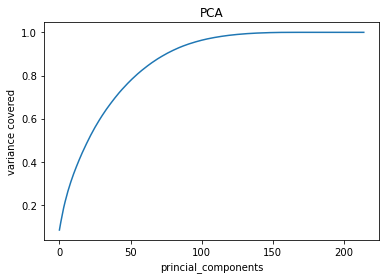

In [53]:
x_test=Data_test.drop(columns=['SalePrice'],axis=1)
scaler=StandardScaler()
x_scaled_test=scaler.fit_transform(x_test)
#PCA componets of the test data
components_test=pca.fit_transform(x_scaled_test)
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('princial_components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

In [56]:
principl_component_test=pd.DataFrame(components_test)
#principl_component_test=principl_component_test.iloc[:,:170]

In [59]:
y_pred=RFR.predict(principl_component_test)
y_pred=pd.DataFrame(y_pred)

In [60]:
writer=pd.ExcelWriter('Output_House_price_prediction.xlsx')
y_pred.to_excel(writer,"output_house_price_pred", header=True, index= False)
writer.save()